In [8]:
from __future__ import division
import plotly
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username='Isaac_S', api_key='KJba6wzin95iSJHLMkXn')
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [9]:
# campaign data
phases = ['Visit', 'Sign-up', 'Selection', 'Purchase', 'Review']
values = [13873, 10553, 5443, 3703, 1708]
 
colors = ['rgb(32,155,160)', 'rgb(253,93,124)', 'rgb(28,119,139)', 'rgb(182,231,235)', 'rgb(35,154,160)']

Create the Boxes to display the funnel

In [10]:
n_phase = len(phases)
 
# fixed width for the plot
plot_width = 400
 
# height of a section and difference between sections 
section_h = 100
section_d = 10
 
# multiply factor to calculate the width of other sections
unit_width = plot_width / max(values)
 
# width for all the sections (phases)
phase_w = [int(value * unit_width) for value in values]


In [11]:
height = section_h * n_phase + section_d * (n_phase-1)
shapes = []
label_y = []

In [12]:
for i in range(n_phase):
        if (i == n_phase-1):
                points = [phase_w[i]/2, height, phase_w[i]/2, height - section_h]
        else:
                points = [phase_w[i]/2, height, phase_w[i+1]/2, height - section_h]
 
        path = 'M {0} {1} L {2} {3} L -{2} {3} L -{0} {1} Z'.format(*points)
 
        shape = {
                'type': 'path',
                'path': path,
                'fillcolor': colors[i],
                'line': {
                    'width': 1,
                    'color': colors[i]
                }
        }
        shapes.append(shape)
        
        # Y-axis location for this section's details (phase name and value)
        label_y.append(height - (section_h / 2))
 
        height = height - (section_h + section_d)

In [13]:
# For phase names
label_trace = go.Scatter(
    x=[-350]*n_phase,
    y=label_y,
    mode='text',
    text=phases,
    textfont=dict(
        color='rgb(200,200,200)',
        size=15
    )
)
 
# For phase values
value_trace = go.Scatter(
    x=[350]*n_phase,
    y=label_y,
    mode='text',
    text=values,
    textfont=dict(
        color='rgb(200,200,200)',
        size=15
    )
)

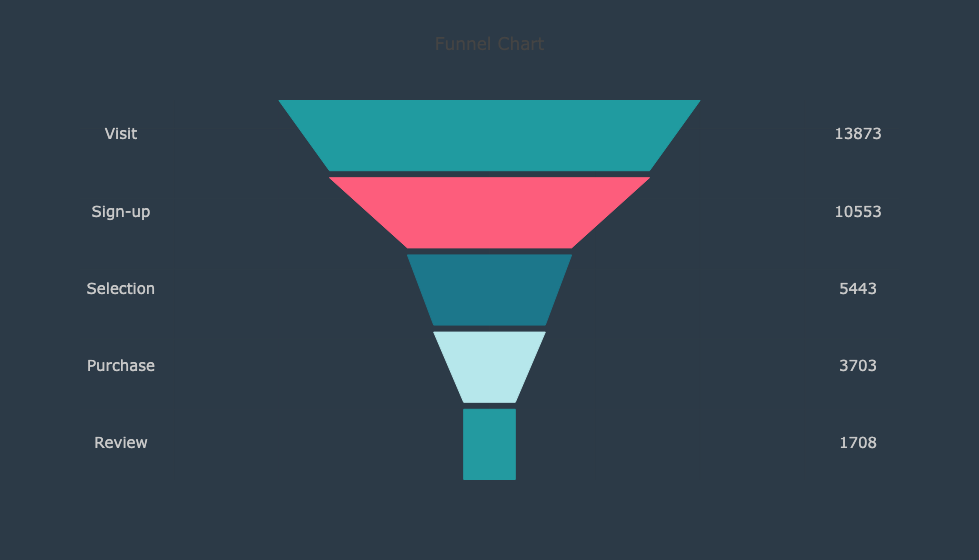

In [14]:
data = [label_trace, value_trace]
 
layout = go.Layout(
    title='Funnel Chart',
    shapes=shapes,
    height=560,
    width=800,
    showlegend=False,
    paper_bgcolor='rgba(44,58,71,1)',
    plot_bgcolor='rgba(44,58,71,1)',
    xaxis=dict(
        showticklabels=False,
        zeroline=False,
    ),
    yaxis=dict(
        showticklabels=False,
        zeroline=False
    )
)
 
fig = go.Figure(data=data, layout=layout)
iplot(fig)